# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

## Importing the dataset

In [ ]:
dataset = pd.read_csv('boston_r.csv')
dataset.head
dataset.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

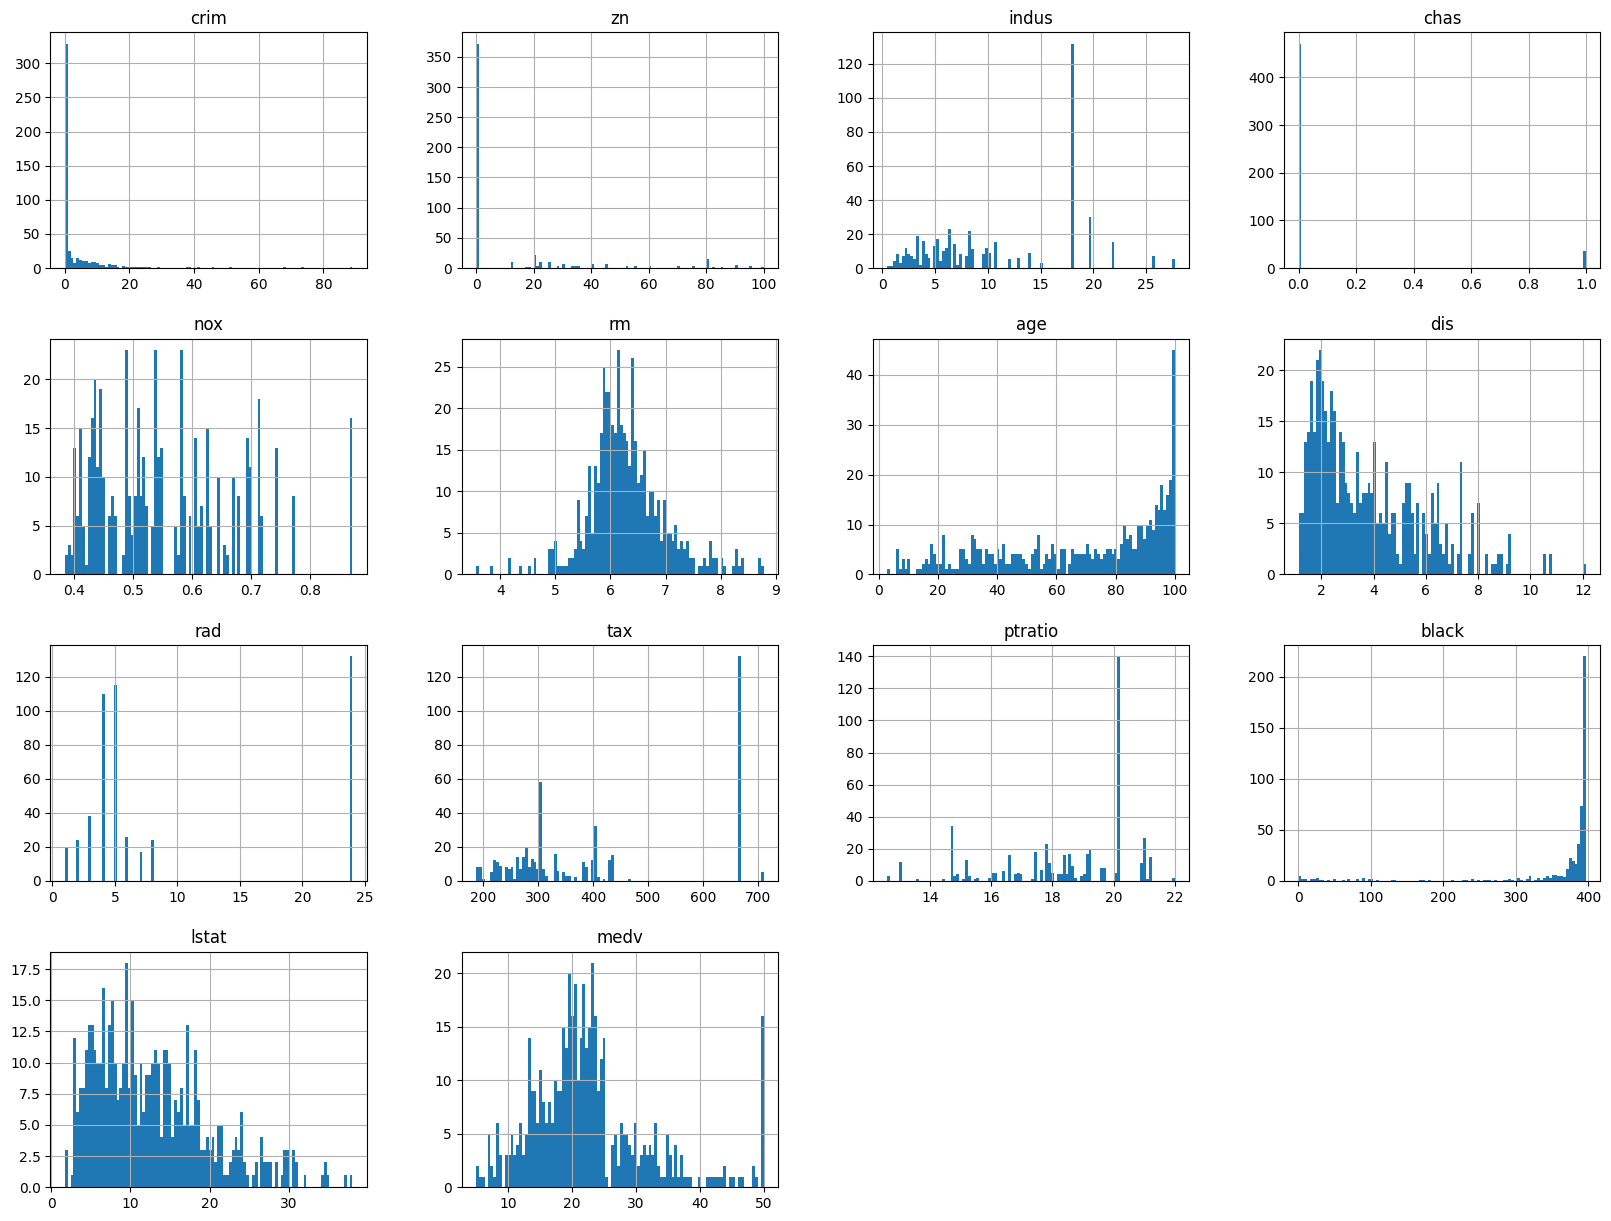

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(bins=100, figsize=(20,15))
plt.show()

## Exploration

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

<Axes: >

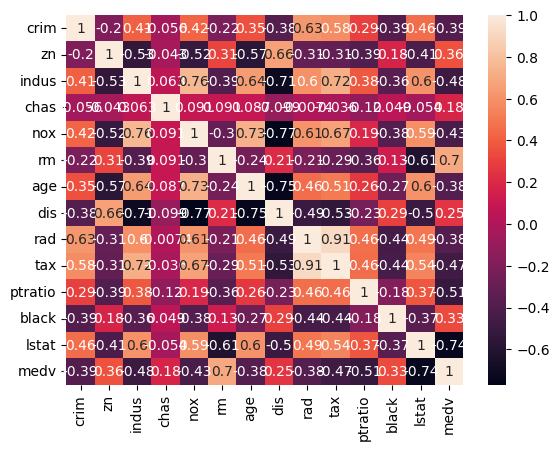

In [ ]:
# Correlation Matrix formation
corr_matrix = dataset.corr()
print(corr_matrix)
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)

In [ ]:
dataset.corr().sort_values("medv")["medv"]

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
black      0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

## Data-pre-processing

In [ ]:
X = dataset[["lstat","rm"]]
y = dataset["medv"]
X.head()

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


## Hold-Out: Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

     lstat     rm
220   9.71  6.951
71    9.88  5.961
240  11.38  6.897
6    12.43  6.012
417  26.64  5.304
..     ...    ...
323  11.74  5.708
192   2.87  7.178
117  10.30  6.021
47   18.80  6.030
172  14.69  5.572

[404 rows x 2 columns]


In [ ]:
print(X_test)

     lstat     rm
329   7.34  6.333
371   9.53  6.216
219  10.50  6.373
403  19.77  5.349
78   12.34  6.232
..     ...    ...
56    5.77  6.383
455  18.13  6.525
60   13.15  5.741
213   9.38  6.375
108  12.27  6.474

[102 rows x 2 columns]


In [ ]:
print(y_train)

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: medv, Length: 404, dtype: float64


In [ ]:
print(y_test)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: medv, Length: 102, dtype: float64


## Feature Scaling on Training Set & Test Set

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training first model using Multiple Linear Regression model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[-4.7745712   3.54483302]
22.6118811881188
Features : ['lstat', 'rm']
Coefficients: [-4.7745712   3.54483302]
Intercept : 22.6118811881188


## RMSE evaluation

In [ ]:
import math
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE = ", rmse)

RMSE =  6.114172522817781
